<a href="https://colab.research.google.com/github/codefusser/DL/blob/main/Chapter%202_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# math library
import numpy as np
# import ploting library
import matplotlib.pyplot as plt

In [2]:
# create some input and output data
# x = np.linspace(0, 2, 12)
# y = np.sin(x)
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

# printout
print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [3]:
# define 1D regression model
def reg_model(x, phi0, phi1):
    return phi0 * x + phi1

In [4]:
# create a function for plotting this data
def plot_1D(x, y, phi0, phi1):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  plt.xlim([0, 2.0])
  plt.ylim([0, 2.0])
  # ax.plot(x, reg_model(x, phi0, phi1))
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  # draw a line
  x_line = np.arange(0, 2, 0.01)
  y_line = reg_model(x_line, phi0, phi1) # Calculate y_line using x_line

  # plot a line
  plt.plot(x_line, y_line, 'b-',lw=2)
  # ax.axvline(x=0, color='k', linestyle='--')
  plt.show()

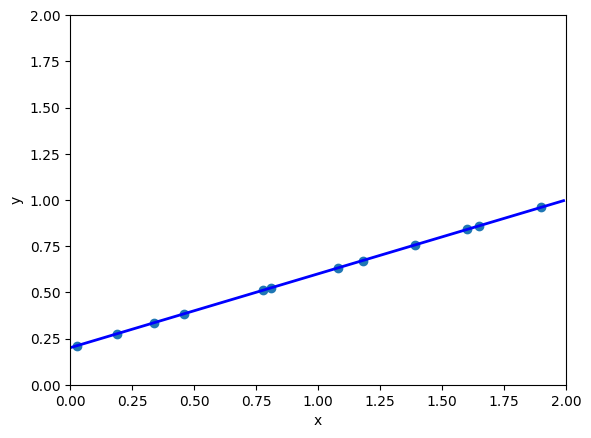

In [5]:
# plot the graph
# set the intercept and slope
phi0 = 0.4; phi1 = 0.2
y = reg_model(x, phi0, phi1)
plot_1D(x, y, phi0, phi1)


In [6]:
print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.212 0.276 0.336 0.384 0.512 0.524 0.632 0.672 0.756 0.84  0.86  0.96 ]


In [7]:
# function to calculate the loss
def loss(x, y, phi0, phi1):
    return np.sum((y - reg_model(x, phi0, phi1))**2)

In [8]:
# compute the loss for our current model
fn_loss = loss(x, y, phi0, phi1)
print(f"The loss function for the linear regression model is: {fn_loss}")

The loss function for the linear regression model is: 0.0


In [9]:
# Compute the loss for our current model
op_loss = loss(x,y,phi0,phi1)
print(f'Your Loss = {op_loss:3.2f}, Ground truth =7.07')

Your Loss = 0.00, Ground truth =7.07


In [10]:
print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.212 0.276 0.336 0.384 0.512 0.524 0.632 0.672 0.756 0.84  0.86  0.96 ]


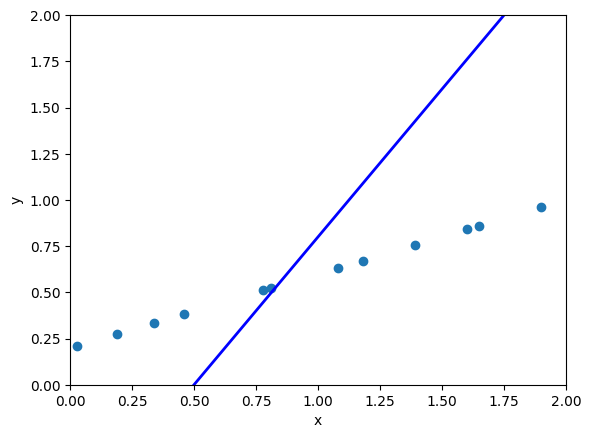

Your Loss = 6.23, Ground truth =10.28


In [11]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot_1D(x,y,phi0,phi1)
loss_val = loss(x,y,phi0,phi1)
print(f'Your Loss = {loss_val:3.2f}, Ground truth =10.28')

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.212 0.276 0.336 0.384 0.512 0.524 0.632 0.672 0.756 0.84  0.86  0.96 ]


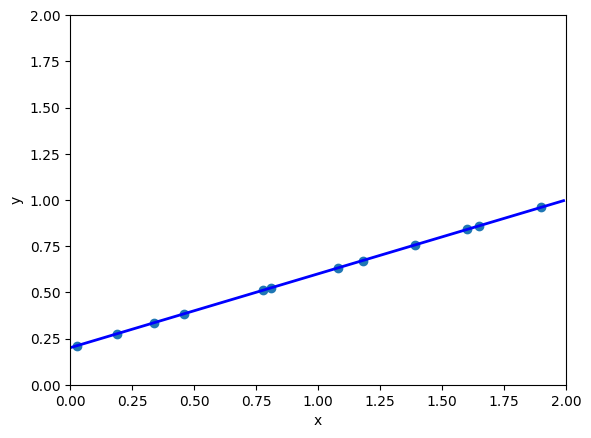

Your Loss = 0.00


In [32]:
# TODO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that is a perfect fit for the model
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 0.4 ; phi1 =0.2
print(x)
print(y)
plot_1D(x,y,phi0,phi1)
print(f'Your Loss = {loss(x,y,phi0,phi1):3.2f}')

In [33]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = loss(x,y, phi0_mesh[indices], phi1_mesh[indices])

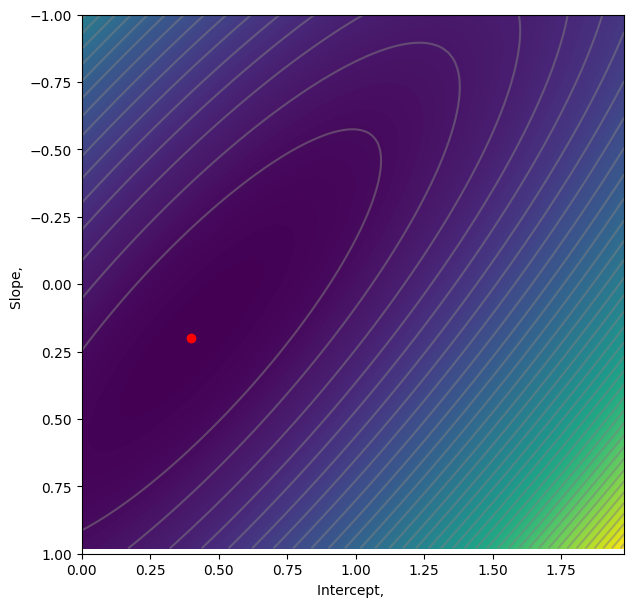

In [37]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, ')
ax.set_ylabel(r'Slope, ')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()